# Derivatives

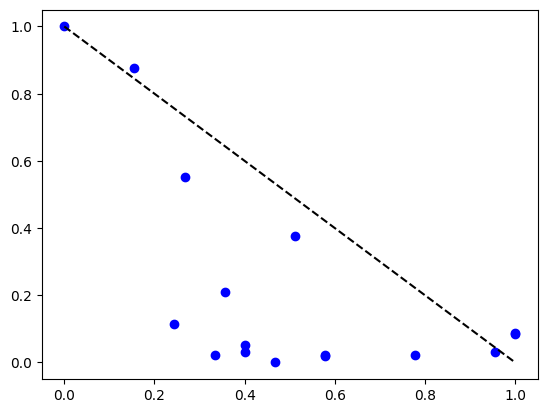

In [145]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

# https://journalistsresource.org
dataset = [
    [1988,	10.30,	183800], [1989,	10.30,	183200], [1990,	10.10,	174900], [1991,	9.30,	173500],
    [1992,	8.40,	172900], [1993,	7.30,	173200], [1994,	8.40,	173200], [1995,	7.90,	169700],
    [1996,	7.60,	174500], [1997,	7.60,	177900], [1998,	6.90,	188100], [1999,	7.40,	203200],
    [2000,	8.10,	230200], [2001,	7.00,	258200], [2002,	6.50,	309800], [2003,	5.80,	329800]
]

# dataset = [
#     [1988,	0,	1], [1989,	0.2,	0.75], [1990,	0.5,	0.5], [1991,	0.8,	0.25],
#     [1988,	1, 0]
# ]

d = "interest"
t = "price"

df = pd.DataFrame(dataset, columns=["year", "interest", "price"])

scaler = MinMaxScaler()
df[[d, t]] = scaler.fit_transform(df[[d, t]])

plt.plot(df[d], df[t], 'bo')

# Regression fn: Mw(d) = w[0] + W[1] * d[1]
reg_fn = lambda w0, w1: lambda d1_points:  [w0 + (d1 * w1) for d1 in d1_points]
d1_points = [0,1]

reg_model = reg_fn(w0=1, w1=-1)
plt.plot(d1_points, reg_model(d1_points), 'k--')
plt.show()
# df.plot.scatter(x='interest', y='price')

## Measuring error
Sum of squared errors is a way of measuring the fit of simple linear regression models. 'Squared' is to remove negative values. 
```
|                   n                          |
| L2(Mw, D) = 0.5 x Σ ( t[i] - Mw(d[i]) )^2    |
|                  i=1                         |
```

In [146]:
reg_fn = lambda w0, w1: lambda d1:  w0 + (d1 * w1)
reg_model = reg_fn(w0=1, w1=-1)

df['pred'] = round( reg_model(df[d]) ,10)
df['error'] = df[t] - df['pred']
df['error_sq'] = df['error']**2

print(f"Sum of squared errors: {round(df['error_sq'].sum(),5)}")
print(f"L2: {round(df['error_sq'].sum()/2,5)}")
df.head(5)

Sum of squared errors: 2.34845
L2: 1.17423


,year,interest,price,pred,error,error_sq
0,1988,1.000000,0.088070,-0.000000,0.088070,0.007756
1,1989,1.000000,0.084322,-0.000000,0.084322,0.007110
2,1990,0.955556,0.032480,0.044444,-0.011965,0.000143
3,1991,0.777778,0.023735,0.222222,-0.198487,0.039397
4,1992,0.577778,0.019988,0.422222,-0.402235,0.161793


In [147]:
reg_fn = lambda w0, w1: lambda d1:  w0 + (d1 * w1)
reg_model = reg_fn(w0=0.89, w1=-1.33) # trial and error

df['pred'] = round( reg_model(df[d]) ,10)
df['error'] = df[t] - df['pred']
df['error_sq'] = df['error']**2

print(f"Sum of squared errors: {round(df['error_sq'].sum(),5)}")
print(f"L2: {round(df['error_sq'].sum()/2,5)}")
df.head(5)

Sum of squared errors: 1.55094
L2: 0.77547


,year,interest,price,pred,error,error_sq
0,1988,1.000000,0.088070,-0.440000,0.528070,0.278858
1,1989,1.000000,0.084322,-0.440000,0.524322,0.274914
2,1990,0.955556,0.032480,-0.380889,0.413369,0.170874
3,1991,0.777778,0.023735,-0.144444,0.168180,0.028284
4,1992,0.577778,0.019988,0.121556,-0.101568,0.010316


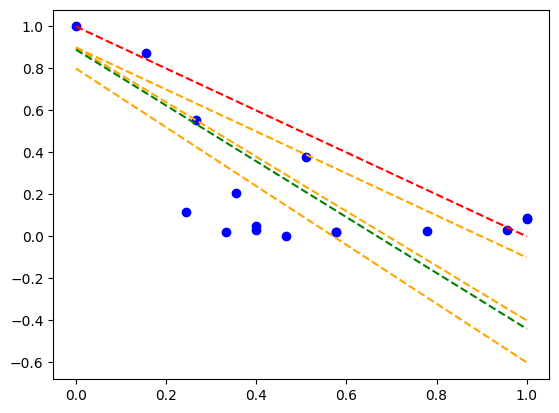

In [148]:
plt.plot(df[d], df[t], 'bo')

# Regression fn: Mw(d) = w[0] + W[1] * d[1]
reg_fn = lambda w0, w1: lambda d1_points:  [w0 + (d1 * w1) for d1 in d1_points]
d1_points = [0,1]

# first line
start_model = reg_fn(w0=1, w1=-1)
plt.plot(d1_points, start_model(d1_points), '--', color='red')

# trial lines
reg_models = [reg_fn(w0=0.9, w1=-1),reg_fn(w0=0.9, w1=-1.3),reg_fn(w0=0.8, w1=-1.4)]
for m in reg_models:
    plt.plot(d1_points, m(d1_points), '--', color="orange")

# best line
best_model = reg_fn(w0=0.89, w1=-1.33)
plt.plot(d1_points, best_model(d1_points), '--', color='green')
plt.show()

### Plotting the error surface

Minimum error surface:
w0     0.550000
w1    -0.660000
sse    0.469357
Name: 464, dtype: float64


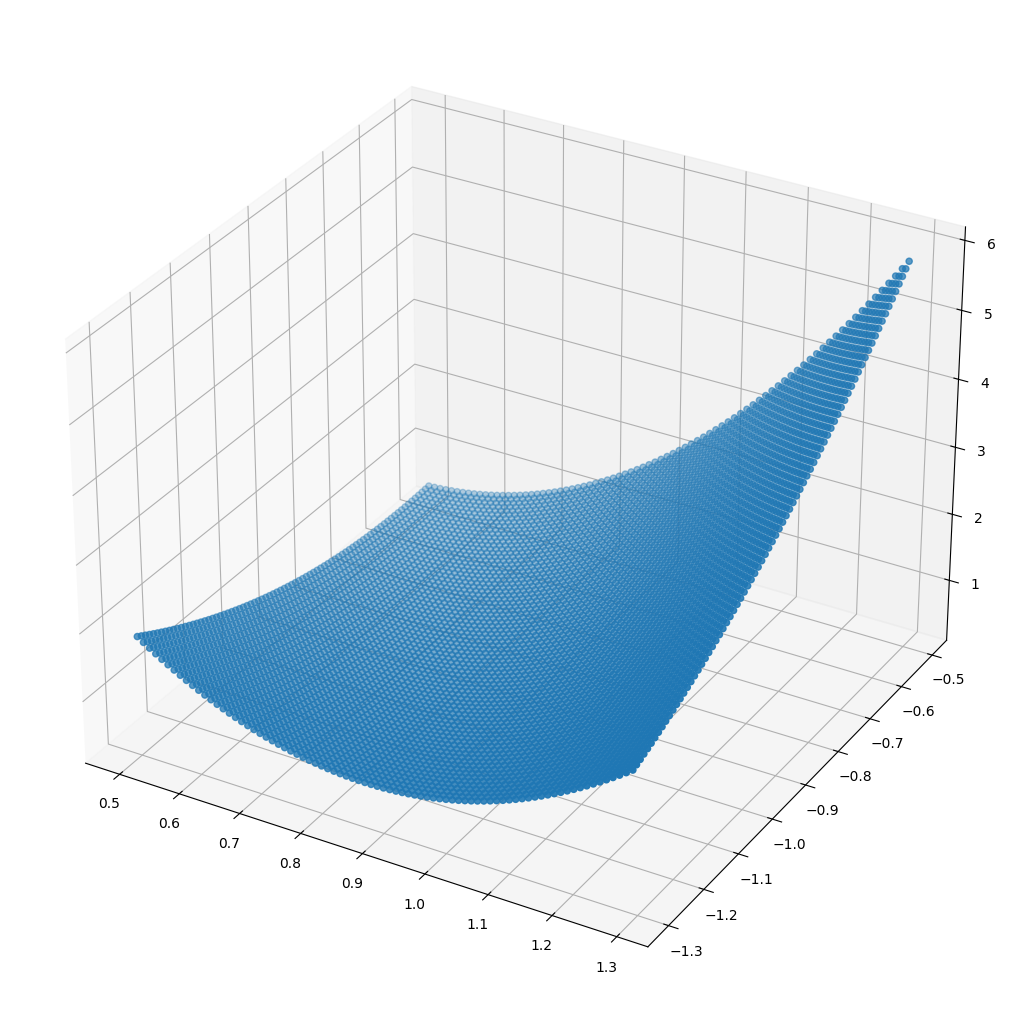

In [158]:
def sse_fn(w0, w1):
    sq_errors = ( df[t] - (w0 + (w1 * df[d])) ) ** 2
    return 0.5 * sq_errors.sum()

steps = 80; offset_w0 = 0.5; offset_w1 = -1.3
sse = [[offset_w0 + ((x//steps)/100), (offset_w1 + (x % steps)/100)] for x in range(0,steps**2)]
sse_df = pd.DataFrame(sse, columns=['w0', 'w1'])

sse_df['sse'] = sse_df.apply(lambda row: sse_fn(row['w0'], row['w1']), axis=1)
fig = plt.figure(figsize=(13,13))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# plotting
ax.scatter(sse_df['w0'], sse_df['w1'], sse_df['sse'])
min_sse_row = sse_df.loc[sse_df['sse'].idxmin()]
print(f"Minimum error surface:\n{min_sse_row}")

### So apparently, there is an even better one

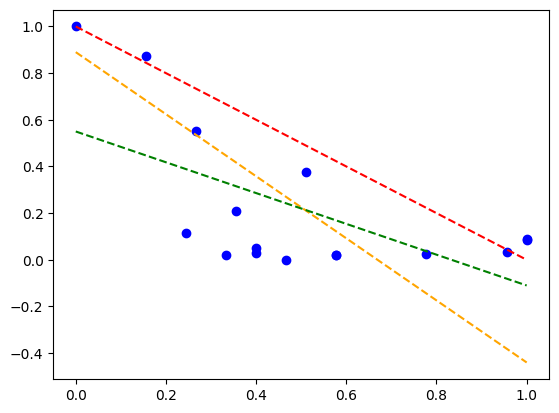

In [159]:
plt.plot(df[d], df[t], 'bo')

# Regression fn: Mw(d) = w[0] + W[1] * d[1]
reg_fn = lambda w0, w1: lambda d1_points:  [w0 + (d1 * w1) for d1 in d1_points]
d1_points = [0,1]

# first line
start_model = reg_fn(w0=1, w1=-1)
plt.plot(d1_points, start_model(d1_points), '--', color='red')

# previous best line
best_model = reg_fn(w0=0.89, w1=-1.33)
plt.plot(d1_points, best_model(d1_points), '--', color='orange')

# previous best line
best_model = reg_fn(w0=0.55, w1=-0.66)
plt.plot(d1_points, best_model(d1_points), '--', color='green')

plt.show()